<a href="https://colab.research.google.com/github/Mifekmk/SkillTreePython-DataAnalysis/blob/main/%EA%B3%BC%EC%A0%9C2_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EB%88%84%EA%B0%80_%EC%82%B4%EC%95%84%EB%82%A8%EC%95%98%EC%9D%84%EA%B9%8C%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **과제2: 타이타닉 : 누가 살아남았을까?**
---

* https://dacon.io/competitions/open/235539/data
* 수업 시간에 배운 내용들을 적용하여 이진분류를 진행하고 리더보드에 결과를 제출합니다.
* 평가 지표는 AUC 이지만 아직 배우지 않은 내용이므로, 우선 정확도로 평가하세요

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/submission.csv')

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
train.Cabin.unique(),train.Embarked.unique()

(array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
        'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
        'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
        'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
        'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
        'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
        'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
        'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
        'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
        'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
        'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
        'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
        'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
        'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
   

In [ ]:
survival = train.Survived.sum()
n_survival = train.shape[0] - survival

In [ ]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
train['Sex']

0           0
1      female
2      female
3      female
4           0
        ...  
886         0
887    female
888    female
889         0
890         0
Name: Sex, Length: 891, dtype: object

In [ ]:
train['Embarked'] = train['Embarked'].fillna('S')

In [ ]:
train['Age'] = train['Age'].fillna(train['Age'].median())

In [ ]:
y = train.Survived

In [ ]:
bin = [0, 18, 25, 35, 60, 100]
group_names = ['Baby', 'Youth', 'YoungAdult', 'MiddleAged', 'Senior']
train['AgeGroup'] = pd.cut(train['Age'], bins=bin, labels=group_names)
train['AgeGroup'].value_counts()


YoungAdult    373
MiddleAged    195
Youth         162
Baby          139
Senior         22
Name: AgeGroup, dtype: int64

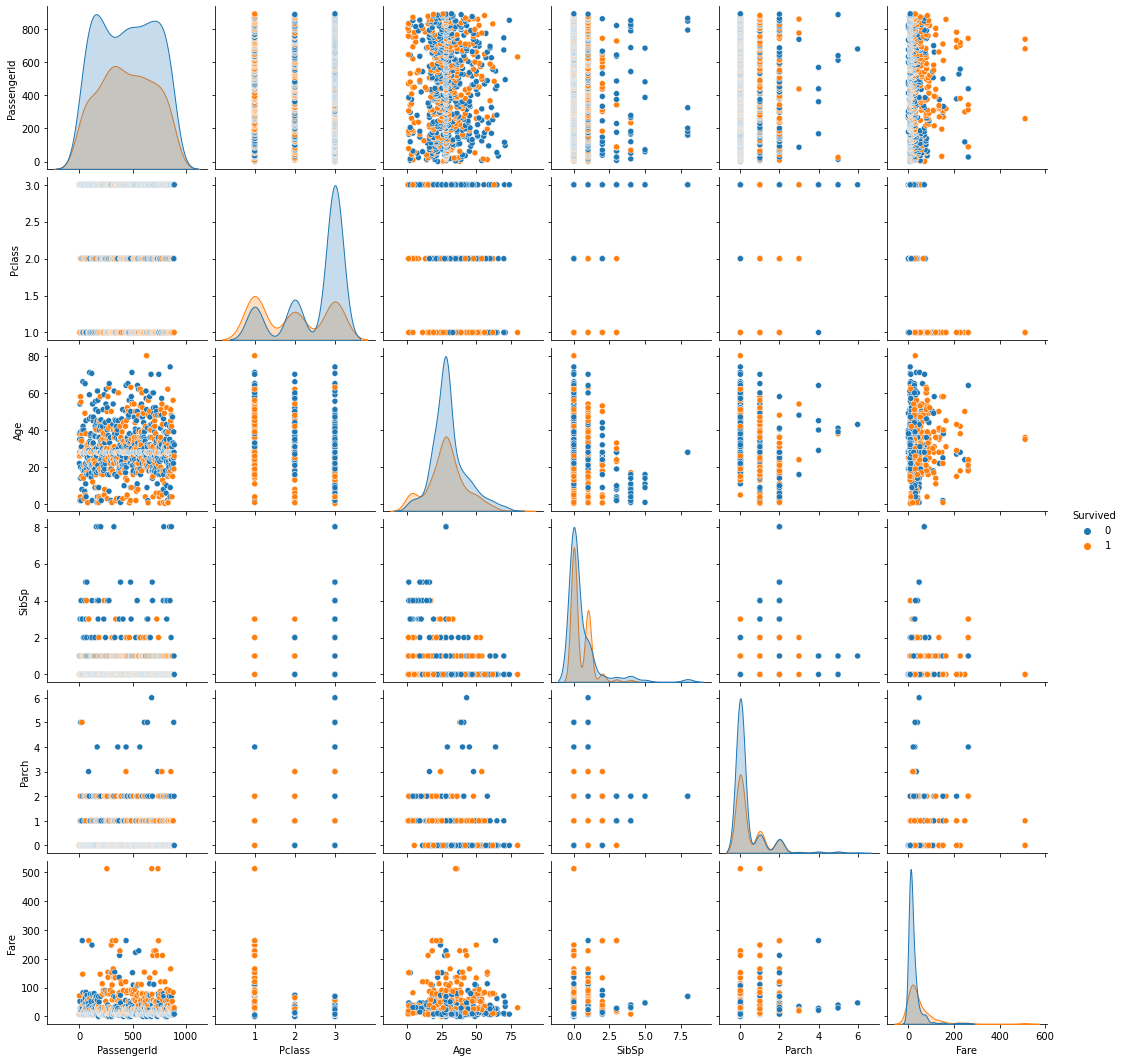

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(train, hue='Survived')
plt.show()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    object  
 12  Title        891 non-null    object  
 13  AgeGroup     891 non-null    category
dtypes: category(1), float64(2), int64(5), object(6)
memory usage: 91.7+ KB


In [ ]:
print(train['Sex'].unique(), train['Embarked'].unique())

['male' 'female'] ['S' 'C' 'Q']


In [ ]:
train.drop(['PassengerId'],axis=1, inplace=True)

In [ ]:
train.drop(['Ticket'],axis=1, inplace=True)

In [ ]:
train.drop(['Title'],axis=1, inplace=True)

In [ ]:
train.drop(['AgeGroup'],axis=1, inplace=True)

In [ ]:
train.drop(['Name'],axis=1, inplace=True)

KeyError: ignored

In [ ]:
train.drop(['Title'],axis=1, inplace=True)
train.drop(['Title'],axis=1, inplace=True)

In [ ]:

train.drop(['Cabin'],axis=1, inplace=True)
train.drop(['Embarked'],axis=1, inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [ ]:
X = train.iloc[:,1:].values
y = train.iloc[:,0].values

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,0,0,0.0,0,0,0.0000
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,0,0,0.0,0,0,0.0000


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
columns = 'Pclass','Name','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked','Title','AgeGroup'
labels = 'alive','die'

In [ ]:
X_train, X_test, y_train, y_test, columns, labels

(array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
        [ 1.    ,  1.    , 30.    ,  0.    ,  0.    , 56.9292],
        [ 2.    ,  1.    , 34.    ,  0.    ,  0.    , 10.5   ],
        ...,
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
        [ 3.    ,  1.    , 28.    ,  0.    ,  0.    ,  7.55  ],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ]]),
 array([[ 1.    ,  1.    , 48.    ,  0.    ,  0.    , 25.9292],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
        [ 2.    ,  1.    , 17.    ,  0.    ,  0.    , 10.5   ],
        ...,
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
        [ 3.    ,  1.    ,  5.    ,  2.    ,  1.    , 19.2583]]),
 array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def draw_cm(model, X, y, title=''):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred) # 혼돈 행렬 구하기
    ConfusionMatrixDisplay(cm, display_labels=labels).plot(cmap='Blues')
    
    if title: plt.title(title)
    plt.show()
    # 모델 평가 (ConfusionMatrix)

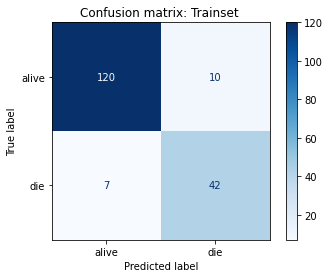

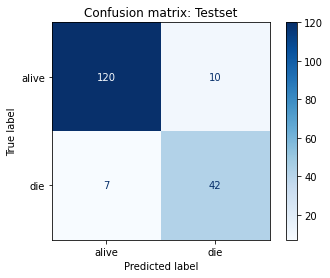

In [ ]:
draw_cm(model, X_train, y_train, 'Confusion matrix: Trainset ')
plt.show()
draw_cm(model, X_test, y_test, 'Confusion matrix: Testset')
plt.show()

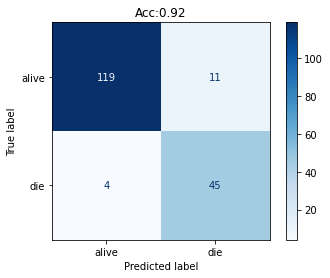

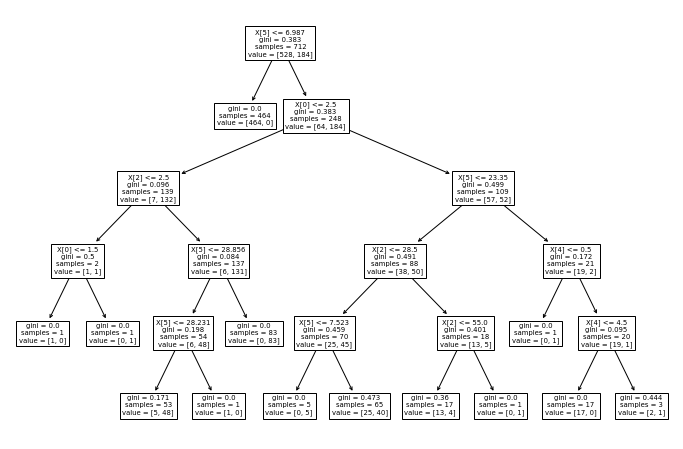

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def draw_cm(model, X, y, labels, title=''):
  y_pred = model.predict(X)
  cm = confusion_matrix(y, y_pred) # 혼돈 행렬 구하기
  ConfusionMatrixDisplay(cm, display_labels=labels).plot(cmap='Blues')
  if title: plt.title(title)

# 학습
model = DecisionTreeClassifier(criterion='gini', 
                               max_depth=5)
model.fit(X_train, y_train)
# 정확도 출력 및 혼돈행렬 시각화
acc = model.score(X_test, y_test)
draw_cm(model, X_test, y_test, labels, title=f'Acc:{np.round(acc,2)}')
plt.show()

# 트리 시각화
plt.figure(figsize=(12,8))
plot_tree(model)
plt.show()

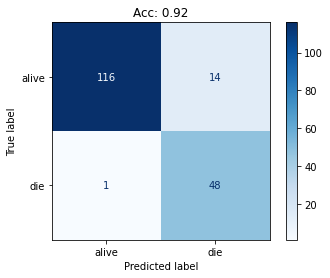

In [ ]:
# SVC
from sklearn.svm import SVC

# 학습
model = SVC(kernel='linear', random_state=1)
model.fit(X_test, y_test)

# 정확도 출력 및 혼돈행렬 시각화
draw_cm(model, X_test, y_test, labels, title=f'Acc: {np.round(model.score(X_test, y_test), 2)}')
plt.show()

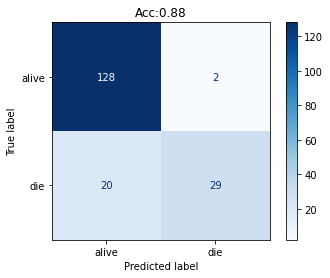

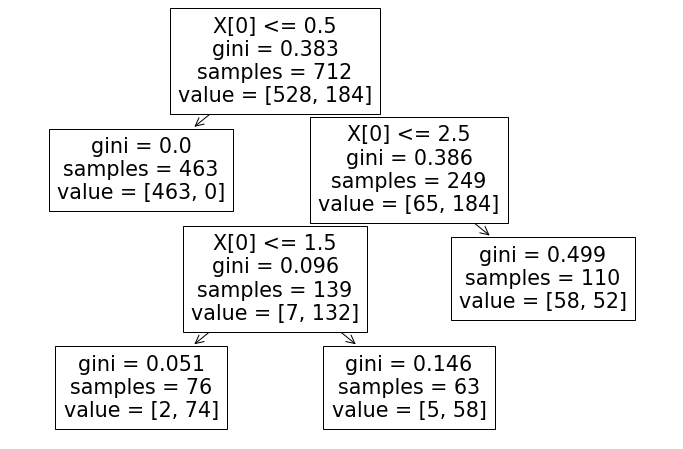

In [ ]:
# 학습
model = DecisionTreeClassifier(criterion='gini', 
                               max_depth=5)
model.fit(X_train[:,:2], y_train)
# 정확도 출력 및 혼돈행렬 시각화
acc = model.score(X_test[:,:2], y_test)
draw_cm(model, X_test[:,:2], y_test, labels, title=f'Acc:{np.round(acc,2)}')
plt.show()

# 트리 시각화
plt.figure(figsize=(12,8))
plot_tree(model)
plt.show()

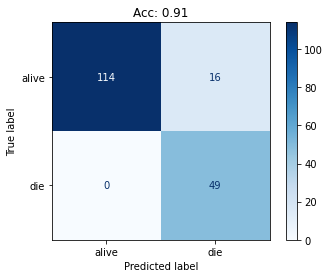

In [ ]:
from sklearn.svm import SVC

# 학습
model = SVC(kernel='linear', random_state=1)
model.fit(X_train[:,:2], y_train)

# 정확도 출력 및 혼돈행렬 시각화
draw_cm(model, X_test[:,:2], y_test, labels, title=f'Acc: {np.round(model.score(X_test[:,:2], y_test), 2)}')
plt.show()

In [ ]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
test.drop(['PassengerId','Name','Ticket','Cabin', 'Embarked'],axis=1, inplace=True)

In [ ]:
test.drop(['Sex'],axis=1, inplace=True)

In [ ]:
test.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,34.5,0,0,7.8292
1,3,47.0,1,0,7.0000
2,2,62.0,0,0,9.6875
3,3,27.0,0,0,8.6625
4,3,22.0,1,1,12.2875


In [ ]:
x_train,x_test,yy_train,yy_test =train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
model.fit(x_train,yy_train)
test_y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def draw_cm(model, X, y, title=''):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, test_y_pred) # 혼돈 행렬 구하기
    ConfusionMatrixDisplay(cm, display_labels=labels).plot(cmap='Blues')
    
    if title: plt.title(title)
    plt.show()
    # 모델 평가 (ConfusionMatrix)

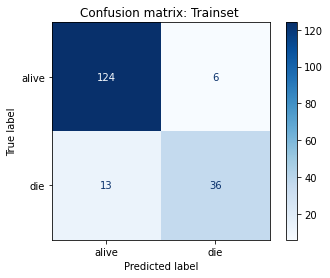

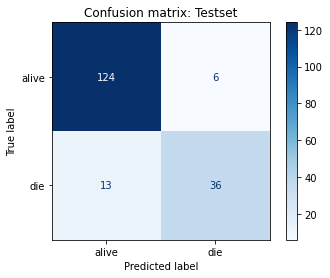

In [ ]:
draw_cm(model, x_train, yy_train, 'Confusion matrix: Trainset ')
plt.show()
draw_cm(model, x_test, yy_test, 'Confusion matrix: Testset')
plt.show()

AttributeError: ignored

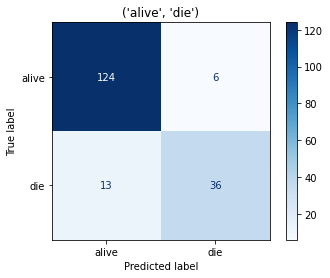

In [ ]:
# SVC
from sklearn.svm import SVC

# 학습
model = SVC(kernel='linear', random_state=1)
model.fit(x_test, yy_test)

# 정확도 출력 및 혼돈행렬 시각화
draw_cm(model, x_test, yy_test, labels, )
plt.show()



In [ ]:
submission.to_csv('타이타닉 생존자 자료.csv', index=False)